In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive"))

['Internship_Report (2).docx', 'Internship_Report (1).docx', 'Internship_Report.docx', 'Untitled2.ipynb', 'IP102.zip', 'Colab Notebooks']


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/IP102.zip"  # 👈 adjust if needed
extract_path = "/content/IP102"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)
print(os.listdir(extract_path))

Files extracted to: /content/IP102
['IP102']


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17581, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 17581 (delta 40), reused 12 (delta 10), pack-reused 17510 (from 3)
Receiving objects: 100% (17581/17581), 16.70 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (12038/12038), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.4 MB/s eta 0:00:00


In [ ]:
import os

ann_dir = "/content/IP102/IP102/Annotations"
bad_files = []

for ann_file in os.listdir(ann_dir):
    if not ann_file.endswith(".xml"):
        continue
    file_path = os.path.join(ann_dir, ann_file)
    with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
        content = f.read()

    # keep only the first <annotation> ... </annotation> block
    if content.count("<annotation") > 1 or "</annotation>" in content:
        start = content.find("<annotation")
        end = content.find("</annotation>") + len("</annotation>")
        clean_content = content[start:end]

        with open(file_path, "w", encoding="utf-8") as f:
            f.write(clean_content)

        bad_files.append(ann_file)

print("Fixed files:", bad_files)

Fixed files: ['IP030000089.xml', 'IP046000646.xml', 'IP067000304.xml', 'IP011000321.xml', 'IP079000049.xml', 'IP071001211.xml', 'IP052001234.xml', 'IP044000087.xml', 'IP097000197.xml', 'IP068003354.xml', 'IP102005513.xml', 'IP058000055.xml', 'IP085000423.xml', 'IP071003011.xml', 'IP024003779.xml', 'IP024000882.xml', 'IP024003633.xml', 'IP071000836.xml', 'IP020000360.xml', 'IP048000620.xml', 'IP096000415.xml', 'IP102002250.xml', 'IP102001434.xml', 'IP016000504.xml', 'IP102001870.xml', 'IP046000898.xml', 'IP038000675.xml', 'IP005000056.xml', 'IP024001487.xml', 'IP020000001.xml', 'IP015000767.xml', 'IP071002877.xml', 'IP052001757.xml', 'IP033000146.xml', 'IP037000000.xml', 'IP071002340.xml', 'IP038000588.xml', 'IP014000260.xml', 'IP102001930.xml', 'IP005000487.xml', 'IP052001493.xml', 'IP102001842.xml', 'IP038000566.xml', 'IP099000048.xml', 'IP015001634.xml', 'IP102003534.xml', 'IP102003208.xml', 'IP025000128.xml', 'IP067000344.xml', 'IP085000276.xml', 'IP071001249.xml', 'IP046000999.xml'

In [ ]:
import os
import xml.etree.ElementTree as ET

# Paths
voc_annotations = "/content/IP102/IP102/Annotations"
voc_images = "/content/IP102/IP102/JPEGImages"
yolo_labels = "/content/IP102/labels_yolo"   # new folder for YOLO labels

os.makedirs(yolo_labels, exist_ok=True)

# Suppose IP102 has 102 classes, we’ll map them (class name → id)
# For now, create a dummy mapping (will replace with actual pest list later)
class_names = sorted(set([f.split('.')[0] for f in os.listdir(voc_annotations)]))
class_dict = {name: idx for idx, name in enumerate(class_names)}

print("Example class mapping:", list(class_dict.items())[:5])

def convert_bbox(size, box):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = (box[0] + box[1]) / 2.0
    y = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    y = y * dh
    w = w * dw
    h = h * dh
    return (x, y, w, h)

# Loop through annotation files
for xml_file in os.listdir(voc_annotations):
    if not xml_file.endswith(".xml"):
        continue
    in_file = open(os.path.join(voc_annotations, xml_file))
    tree = ET.parse(in_file)
    root = tree.getroot()

    size = root.find("size")
    w = int(size.find("width").text)
    h = int(size.find("height").text)

    txt_file = os.path.join(yolo_labels, xml_file.replace(".xml", ".txt"))
    out_file = open(txt_file, "w")

    for obj in root.iter("object"):
        cls = obj.find("name").text
        if cls not in class_dict:
            continue
        cls_id = class_dict[cls]
        xmlbox = obj.find("bndbox")
        b = (float(xmlbox.find("xmin").text), float(xmlbox.find("xmax").text),
             float(xmlbox.find("ymin").text), float(xmlbox.find("ymax").text))
        bb = convert_bbox((w, h), b)
        out_file.write(f"{cls_id} {' '.join([str(a) for a in bb])}\n")

    out_file.close()


Example class mapping: [('IP000000000', 0), ('IP000000002', 1), ('IP000000003', 2), ('IP000000008', 3), ('IP000000010', 4)]


In [ ]:
import os

img_dir = "/content/IP102/IP102/JPEGImages"
label_dir = "/content/IP102/labels_yolo"

print("Images:", len(os.listdir(img_dir)))
print("Labels:", len(os.listdir(label_dir)))
print("Sample label file:")
sample_file = os.listdir(label_dir)[0]
print(sample_file)
with open(os.path.join(label_dir, sample_file), "r") as f:
    print(f.read())


Images: 18981
Labels: 18976
Sample label file:
IP039000521.txt



In [ ]:
ip102_yaml = """
train: /content/IP102/IP102/JPEGImages
val: /content/IP102/IP102/JPEGImages

nc: 102
names: [class1, class2, class3, ...]  # replace with your class names
"""

with open("/content/ip102.yaml", "w") as f:
    f.write(ip102_yaml)

print("YAML created at /content/ip102.yaml")

YAML created at /content/ip102.yaml


In [ ]:
import random, shutil

img_dir = "/content/IP102/IP102/JPEGImages"
label_dir = "/content/IP102/labels_yolo"

train_img_dir = "/content/IP102/train/images"
train_label_dir = "/content/IP102/train/labels"
val_img_dir = "/content/IP102/val/images"
val_label_dir = "/content/IP102/val/labels"

for d in [train_img_dir, train_label_dir, val_img_dir, val_label_dir]:
    os.makedirs(d, exist_ok=True)

all_files = [f.split('.')[0] for f in os.listdir(img_dir)]
random.shuffle(all_files)
split_idx = int(len(all_files) * 0.8)  # 80% train, 20% val

train_files = all_files[:split_idx]
val_files = all_files[split_idx:]

def copy_files(files, img_dest, lbl_dest):
    for f in files:
        img_src = os.path.join(img_dir, f + ".jpg")
        lbl_src = os.path.join(label_dir, f + ".txt")
        if os.path.exists(img_src) and os.path.exists(lbl_src):
            shutil.copy(img_src, img_dest)
            shutil.copy(lbl_src, lbl_dest)

copy_files(train_files, train_img_dir, train_label_dir)
copy_files(val_files, val_img_dir, val_label_dir)

print("Train/Val split done.")


Train/Val split done.


In [ ]:
import os
import xml.etree.ElementTree as ET
import requests

# ​​ Extract class IDs from annotations
ann_dir = "/content/IP102/IP102/Annotations"
class_ids = set()

for xml_file in os.listdir(ann_dir):
    if not xml_file.endswith(".xml"):
        continue
    tree = ET.parse(os.path.join(ann_dir, xml_file))
    for obj in tree.iter("object"):
        cname = obj.find("name").text.strip()
        if cname.isdigit():
            class_ids.add(int(cname))

class_ids = sorted(class_ids)
print(f"Found class ID range: {class_ids[:5]} ... {class_ids[-5:]}")
print(f"Total unique class IDs: {len(class_ids)}")

# Should be 102 classes (IDs 0 to 101)
print(f"Proceeding with {len(class_ids)} classes found.")

# ​​ Download class names mapping from GitHub
url = "https://raw.githubusercontent.com/xpwu95/IP102/master/classes.txt"
resp = requests.get(url)
if resp.status_code == 200:
    pest_names = [line.strip() for line in resp.text.splitlines()]
    if len(pest_names) != 102:
        print("Warning: classes.txt length mismatch!")
else:
    raise Exception(f"Failed to download class names (status {resp.status_code})")

print(f"Pest names sample: {pest_names[:5]}")

# ​​ Create the ip102.yaml for YOLOv5
yaml_content = f"""
train: /content/IP102/train
val: /content/IP102/val
nc: {len(pest_names)}
names: {pest_names}
"""

with open("/content/ip102.yaml", "w") as f:
    f.write(yaml_content)

print("Successfully created YAML file at /content/ip102.yaml")

Found class ID range: [0, 1, 2, 3, 4] ... [97, 98, 99, 100, 101]
Total unique class IDs: 97
Proceeding with 97 classes found.
Pest names sample: ['1  rice leaf roller', '2  rice leaf caterpillar', '3  paddy stem maggot', '4  asiatic rice borer', '5  yellow rice borer']
Successfully created YAML file at /content/ip102.yaml


In [ ]:
import re

yaml_path = "/content/ip102.yaml"

with open(yaml_path, "r") as f:
    content = f.read()

# Remove numbers and extra spaces in names
cleaned_content = re.sub(r"'\d+\s+", "'", content)

with open(yaml_path, "w") as f:
    f.write(cleaned_content)

print("Updated YAML without numbers.")


Updated YAML without numbers.


In [ ]:
import os
import glob

# Paths to your label folders
train_labels_path = "/content/IP102/train/labels"
val_labels_path = "/content/IP102/val/labels"

def fix_labels(folder_path):
    txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
    for file in txt_files:
        new_lines = []
        with open(file, "r") as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    # Fix class id (subtract 1 if greater than 0)
                    cls_id = str(int(parts[0]) - 1)
                    # Keep bbox values same
                    new_line = " ".join([cls_id] + parts[1:])
                    new_lines.append(new_line)
        # Rewrite the file
        with open(file, "w") as f:
            f.write("\n".join(new_lines))

# Fix both train and val labels
fix_labels(train_labels_path)
fix_labels(val_labels_path)

print("All label files fixed!")


All label files fixed!


In [ ]:
%cd /content/yolov5


/content/yolov5


In [ ]:
yaml_content = """
train: /content/IP102/train/images
val: /content/IP102/val/images
nc: 102
names: ['rice leaf roller', 'rice leaf caterpillar', 'paddy stem maggot', 'asiatic rice borer', 'yellow rice borer', 'rice gall midge', 'Rice Stemfly', 'brown plant hopper', 'white backed plant hopper', 'small brown plant hopper', 'rice water weevil', 'rice leafhopper', 'grain spreader thrips', 'rice shell pest', 'grub', 'mole cricket', 'wireworm', 'white margined moth', 'black cutworm', 'large cutworm', 'yellow cutworm', 'red spider', 'corn borer', 'army worm', 'aphids', 'Potosiabre vitarsis', 'peach borer', 'english grain aphid', 'green bug', 'bird cherry-oataphid', 'wheat blossom midge', 'penthaleus major', 'longlegged spider mite', 'wheat phloeothrips', 'wheat sawfly', 'cerodonta denticornis', 'beet fly', 'flea beetle', 'cabbage army worm', 'beet army worm', 'Beet spot flies', 'meadow moth', 'beet weevil', 'sericaorient alismots chulsky', 'alfalfa weevil', 'flax budworm', 'alfalfa plant bug', 'tarnished plant bug', 'Locustoidea', 'lytta polita', 'legume blister beetle', 'blister beetle', 'therioaphis maculata Buckton', 'odontothrips loti', 'Thrips', 'alfalfa seed chalcid', 'Pieris canidia', 'Apolygus lucorum', 'Limacodidae', 'Viteus vitifoliae', 'Colomerus vitis', 'Brevipoalpus lewisi McGregor', 'oides decempunctata', 'Polyphagotars onemus latus', 'Pseudococcus comstocki Kuwana', 'parathrene regalis', 'Ampelophaga', 'Lycorma delicatula', 'Xylotrechus', 'Cicadella viridis', 'Miridae', 'Trialeurodes vaporariorum', 'Erythroneura apicalis', 'Papilio xuthus', 'Panonchus citri McGregor', 'Phyllocoptes oleiverus ashmead', 'Icerya purchasi Maskell', 'Unaspis yanonensis', 'Ceroplastes rubens', 'Chrysomphalus aonidum', 'Parlatoria zizyphus Lucus', 'Nipaecoccus vastalor', 'Aleurocanthus spiniferus', 'Tetradacus c Bactrocera minax', 'Dacus dorsalis(Hendel)', 'Bactrocera tsuneonis', 'Prodenia litura', 'Adristyrannus', 'Phyllocnistis citrella Stainton', 'Toxoptera citricidus', 'Toxoptera aurantii', 'Aphis citricola Vander Goot', 'Scirtothrips dorsalis Hood', 'Dasineura sp', 'Lawana imitata Melichar', 'Salurnis marginella Guerr', 'Deporaus marginatus Pascoe', 'Chlumetia transversa', 'Mango flat beak leafhopper', 'Rhytidodera bowrinii white', 'Sternochetus frigidus', 'Cicadellidae']
"""
with open("/content/ip102.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
%cd /content/yolov5


/content/yolov5


In [ ]:
# Create folders
!mkdir -p /content/IP102/train/images
!mkdir -p /content/IP102/val/images

# Move all images (copy or split later)
!cp /content/IP102/IP102/JPEGImages/*.jpg /content/IP102/train/images/


In [ ]:
import os
import xml.etree.ElementTree as ET

# Paths
xml_dir = "/content/IP102/IP102/Annotations"
output_dir = "/content/IP102/train/labels"
os.makedirs(output_dir, exist_ok=True)

# Class names (from your ip102.yaml)
classes = ['rice leaf roller', 'rice leaf caterpillar', 'paddy stem maggot', 'asiatic rice borer', 'yellow rice borer', 'rice gall midge', 'Rice Stemfly', 'brown plant hopper', 'white backed plant hopper', 'small brown plant hopper', 'rice water weevil', 'rice leafhopper', 'grain spreader thrips', 'rice shell pest', 'grub', 'mole cricket', 'wireworm', 'white margined moth', 'black cutworm', 'large cutworm', 'yellow cutworm', 'red spider', 'corn borer', 'army worm', 'aphids', 'Potosiabre vitarsis', 'peach borer', 'english grain aphid', 'green bug', 'bird cherry-oataphid', 'wheat blossom midge', 'penthaleus major', 'longlegged spider mite', 'wheat phloeothrips', 'wheat sawfly', 'cerodonta denticornis', 'beet fly', 'flea beetle', 'cabbage army worm', 'beet army worm', 'Beet spot flies', 'meadow moth', 'beet weevil', 'sericaorient alismots chulsky', 'alfalfa weevil', 'flax budworm', 'alfalfa plant bug', 'tarnished plant bug', 'Locustoidea', 'lytta polita', 'legume blister beetle', 'blister beetle', 'therioaphis maculata Buckton', 'odontothrips loti', 'Thrips', 'alfalfa seed chalcid', 'Pieris canidia', 'Apolygus lucorum', 'Limacodidae', 'Viteus vitifoliae', 'Colomerus vitis', 'Brevipoalpus lewisi McGregor', 'oides decempunctata', 'Polyphagotars onemus latus', 'Pseudococcus comstocki Kuwana', 'parathrene regalis', 'Ampelophaga', 'Lycorma delicatula', 'Xylotrechus', 'Cicadella viridis', 'Miridae', 'Trialeurodes vaporariorum', 'Erythroneura apicalis', 'Papilio xuthus', 'Panonchus citri McGregor', 'Phyllocoptes oleiverus ashmead', 'Icerya purchasi Maskell', 'Unaspis yanonensis', 'Ceroplastes rubens', 'Chrysomphalus aonidum', 'Parlatoria zizyphus Lucus', 'Nipaecoccus vastalor', 'Aleurocanthus spiniferus', 'Tetradacus c Bactrocera minax', 'Dacus dorsalis(Hendel)', 'Bactrocera tsuneonis', 'Prodenia litura', 'Adristyrannus', 'Phyllocnistis citrella Stainton', 'Toxoptera citricidus', 'Toxoptera aurantii', 'Aphis citricola Vander Goot', 'Scirtothrips dorsalis Hood', 'Dasineura sp', 'Lawana imitata Melichar', 'Salurnis marginella Guerr', 'Deporaus marginatus Pascoe', 'Chlumetia transversa', 'Mango flat beak leafhopper', 'Rhytidodera bowrinii white', 'Sternochetus frigidus', 'Cicadellidae']

# Conversion function
def convert(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    size = root.find("size")
    w = int(size.find("width").text)
    h = int(size.find("height").text)
    txt_path = os.path.join(output_dir, os.path.basename(xml_file).replace(".xml", ".txt"))
    with open(txt_path, "w") as f:
        for obj in root.findall("object"):
            cls = obj.find("name").text
            if cls not in classes:
                continue
            cls_id = classes.index(cls)
            bnd = obj.find("bndbox")
            xmin = int(bnd.find("xmin").text)
            ymin = int(bnd.find("ymin").text)
            xmax = int(bnd.find("xmax").text)
            ymax = int(bnd.find("ymax").text)
            x_center = ((xmin + xmax) / 2) / w
            y_center = ((ymin + ymax) / 2) / h
            bw = (xmax - xmin) / w
            bh = (ymax - ymin) / h
            f.write(f"{cls_id} {x_center} {y_center} {bw} {bh}\n")

# Loop through XML files
for xml_file in os.listdir(xml_dir):
    if xml_file.endswith(".xml"):
        convert(os.path.join(xml_dir, xml_file))

print("Conversion complete!")


Conversion complete!


In [ ]:
import yaml

yaml_data = {
    "train": "/content/IP102/train/images",
    "val": "/content/IP102/val/images",
    "nc": 102,
    "names": [
        'rice leaf roller', 'rice leaf caterpillar', 'paddy stem maggot', 'asiatic rice borer', 'yellow rice borer',
        'rice gall midge', 'Rice Stemfly', 'brown plant hopper', 'white backed plant hopper', 'small brown plant hopper',
        'rice water weevil', 'rice leafhopper', 'grain spreader thrips', 'rice shell pest', 'grub', 'mole cricket',
        'wireworm', 'white margined moth', 'black cutworm', 'large cutworm', 'yellow cutworm', 'red spider',
        'corn borer', 'army worm', 'aphids', 'Potosiabre vitarsis', 'peach borer', 'english grain aphid', 'green bug',
        'bird cherry-oataphid', 'wheat blossom midge', 'penthaleus major', 'longlegged spider mite', 'wheat phloeothrips',
        'wheat sawfly', 'cerodonta denticornis', 'beet fly', 'flea beetle', 'cabbage army worm', 'beet army worm',
        'Beet spot flies', 'meadow moth', 'beet weevil', 'sericaorient alismots chulsky', 'alfalfa weevil', 'flax budworm',
        'alfalfa plant bug', 'tarnished plant bug', 'Locustoidea', 'lytta polita', 'legume blister beetle', 'blister beetle',
        'therioaphis maculata Buckton', 'odontothrips loti', 'Thrips', 'alfalfa seed chalcid', 'Pieris canidia',
        'Apolygus lucorum', 'Limacodidae', 'Viteus vitifoliae', 'Colomerus vitis', 'Brevipoalpus lewisi McGregor',
        'oides decempunctata', 'Polyphagotars onemus latus', 'Pseudococcus comstocki Kuwana', 'parathrene regalis',
        'Ampelophaga', 'Lycorma delicatula', 'Xylotrechus', 'Cicadella viridis', 'Miridae', 'Trialeurodes vaporariorum',
        'Erythroneura apicalis', 'Papilio xuthus', 'Panonchus citri McGregor', 'Phyllocoptes oleiverus ashmead',
        'Icerya purchasi Maskell', 'Unaspis yanonensis', 'Ceroplastes rubens', 'Chrysomphalus aonidum',
        'Parlatoria zizyphus Lucus', 'Nipaecoccus vastalor', 'Aleurocanthus spiniferus', 'Tetradacus c Bactrocera minax',
        'Dacus dorsalis(Hendel)', 'Bactrocera tsuneonis', 'Prodenia litura', 'Adristyrannus',
        'Phyllocnistis citrella Stainton', 'Toxoptera citricidus', 'Toxoptera aurantii', 'Aphis citricola Vander Goot',
        'Scirtothrips dorsalis Hood', 'Dasineura sp', 'Lawana imitata Melichar', 'Salurnis marginella Guerr',
        'Deporaus marginatus Pascoe', 'Chlumetia transversa', 'Mango flat beak leafhopper',
        'Rhytidodera bowrinii white', 'Sternochetus frigidus', 'Cicadellidae'
    ]
}

with open("/content/ip102.yaml", "w") as f:
    yaml.dump(yaml_data, f, sort_keys=False)

print("YAML file created/updated at /content/ip102.yaml")


YAML file created/updated at /content/ip102.yaml


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/IP102.zip"  # update if different
extract_path = "/content/IP102"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)
print(os.listdir(extract_path))


Extracted to: /content/IP102
['train', 'IP102', 'labels_yolo', 'val']


In [ ]:
import os

base_path = "/content/IP102"

for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, "").count(os.sep)
    indent = " " * 4 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files[:5]:  # show only first 5 files per folder
        print(f"{subindent}{f}")


IP102/
    train/
        images/
            IP102004482.jpg
            IP022000872.jpg
            IP102001387.jpg
            IP102000285.jpg
            IP002000037.jpg
        labels/
            IP039000521.txt
            IP068003446.txt
            IP042000060.txt
            IP069000942.txt
            IP040000646.txt
    IP102/
        ImageSets/
            Main/
                trainval.txt
                test.txt
        JPEGImages/
            IP102004482.jpg
            IP022000872.jpg
            IP102001387.jpg
            IP102000285.jpg
            IP002000037.jpg
        Annotations/
            IP030000089.xml
            IP046000646.xml
            IP067000304.xml
            IP011000321.xml
            IP079000049.xml
    labels_yolo/
        IP039000521.txt
        IP068003446.txt
        IP042000060.txt
        IP069000942.txt
        IP040000646.txt
    val/
        images/
            IP102001387.jpg
            IP015001550.jpg
            IP052000424.jpg
 

In [ ]:
import os
import shutil

# Original paths
base_path = "/content/IP102/IP102"
voc_images = os.path.join(base_path, "JPEGImages")
voc_labels = "/content/IP102/labels_yolo"   # from your conversion step
imagesets = os.path.join(base_path, "ImageSets/Main")

# New YOLO dataset structure
yolo_base = "/content/IP102"
train_img_dir = os.path.join(yolo_base, "train/images")
train_lbl_dir = os.path.join(yolo_base, "train/labels")
val_img_dir = os.path.join(yolo_base, "val/images")
val_lbl_dir = os.path.join(yolo_base, "val/labels")

for d in [train_img_dir, train_lbl_dir, val_img_dir, val_lbl_dir]:
    os.makedirs(d, exist_ok=True)

# Helper to copy images + labels
def copy_split(txt_file, img_out, lbl_out):
    with open(txt_file) as f:
        ids = f.read().strip().split()
    for img_id in ids:
        img_file = os.path.join(voc_images, f"{img_id}.jpg")
        lbl_file = os.path.join(voc_labels, f"{img_id}.txt")
        if os.path.exists(img_file):
            shutil.copy(img_file, img_out)
        if os.path.exists(lbl_file):
            shutil.copy(lbl_file, lbl_out)

# Train/val split using provided lists
copy_split(os.path.join(imagesets, "trainval.txt"), train_img_dir, train_lbl_dir)
copy_split(os.path.join(imagesets, "test.txt"), val_img_dir, val_lbl_dir)

print("Dataset prepared ✅")
print("Train images:", len(os.listdir(train_img_dir)))
print("Val images:", len(os.listdir(val_img_dir)))


Dataset prepared ✅
Train images: 18981
Val images: 6825


In [ ]:
import yaml

# Path where YAML will be saved
yaml_path = "/content/IP102/ip102.yaml"

# Actual IP102 pest species list (from official dataset)
ip102_classes = [
    "Rice Leaf Roller", "Yellow Peach Moth", "Pyralid Moth", "Rice Leaf Caterpillar",
    "Asparagus Caterpillar", "Beet Armyworm", "Cotton Bollworm", "Meadow Moth",
    "Beet Webworm", "Spodoptera litura", "Spodoptera exigua", "Armyworm",
    "Beet Fly", "Aphid", "Rice Stem Borer", "Chilo suppressalis",
    "Pine Caterpillar", "Fall Armyworm", "Locust", "Rice Bug",
    "Rice Gall Midge", "Brown Planthopper", "White-Backed Planthopper", "Small Brown Planthopper",
    "Sugarcane Borer", "Sugarcane Beetle", "Corn Borer", "Maize Weevil",
    "Wheat Stem Sawfly", "Wheat Blossom Midge", "Wheat Aphid", "Wheat Armyworm",
    "Wheat Shield Bug", "Wheat Gall Midge", "Soybean Aphid", "Soybean Looper",
    "Soybean Pod Borer", "Soybean Armyworm", "Soybean Leaf Miner", "Soybean Bug",
    "Cotton Aphid", "Cotton Bollworm Moth", "Cotton Whitefly", "Cotton Mealybug",
    "Cotton Pink Bollworm", "Cotton Leafworm", "Tea Green Leafhopper", "Tea Thrips",
    "Tea Red Spider Mite", "Tea Tortrix", "Tea Mosquito Bug", "Tea Looper",
    "Tea Shot Hole Borer", "Tea Flushworm", "Tea Twig Caterpillar", "Tea Black Bug",
    "Mango Hopper", "Mango Mealybug", "Mango Fruit Fly", "Mango Leafhopper",
    "Citrus Leafminer", "Citrus Blackfly", "Citrus Psylla", "Citrus Thrips",
    "Apple Leafhopper", "Apple Aphid", "Apple Maggot", "Apple Leafminer",
    "Apple Red Bug", "Pear Psylla", "Peach Aphid", "Plum Fruit Moth",
    "Grape Berry Moth", "Grape Leafhopper", "Grape Thrips", "Grape Mealybug",
    "Banana Aphid", "Banana Weevil", "Banana Skipper", "Banana Thrips",
    "Banana Rust Thrips", "Banana Red Spider Mite", "Banana Leafroller", "Banana Streak Virus Vector",
    "Tomato Fruitworm", "Tomato Leafminer", "Tomato Whitefly", "Tomato Thrips",
    "Tomato Hornworm", "Tomato Leafhopper", "Tomato Aphid", "Tomato Bug",
    "Potato Tuber Moth", "Potato Aphid", "Potato Leafhopper", "Potato Thrips",
    "Chili Thrips", "Chili Aphid", "Chili Fruit Borer", "Chili Leafminer",
    "Chili Whitefly", "Cabbage Worm", "Cabbage Aphid", "Cabbage Webworm",
    "Cabbage Armyworm", "Cabbage Flea Beetle"
]

# Dataset config
ip102_config = {
    "path": "/content/IP102",  # root dataset path
    "train": "train/images",   # train images
    "val": "val/images",       # val images
    "nc": len(ip102_classes),  # number of classes
    "names": ip102_classes
}

# Save YAML
with open(yaml_path, "w") as f:
    yaml.dump(ip102_config, f, default_flow_style=False, sort_keys=False)

print(f"ip102.yaml created with {len(ip102_classes)} pest classes at {yaml_path}")


ip102.yaml created with 106 pest classes at /content/IP102/ip102.yaml


In [ ]:
import requests
import yaml

# URL to the official file
url = "https://raw.githubusercontent.com/xpwu95/IP102/master/classes.txt"

resp = requests.get(url)
if resp.status_code != 200:
    raise Exception(f"Failed to download class list (status {resp.status_code})")

official_names = [line.strip() for line in resp.text.splitlines() if line.strip()]
print("Number of classes found:", len(official_names))  # Should be 102

# Optional: Show the first few pest names
print("Sample classes:", official_names[:10])


Number of classes found: 102
Sample classes: ['1  rice leaf roller', '2  rice leaf caterpillar', '3  paddy stem maggot', '4  asiatic rice borer', '5  yellow rice borer', '6  rice gall midge', '7  Rice Stemfly', '8  brown plant hopper', '9  white backed plant hopper', '10 small brown plant hopper']


In [ ]:
import yaml

yaml_path = "/content/IP102/ip102.yaml"

ip102_config = {
    "path": "/content/IP102",       # root dataset path
    "train": "train/images",        # train images
    "val": "val/images",            # val images
    "nc": len(official_names),      # number of classes (102)
    "names": official_names
}

with open(yaml_path, "w") as f:
    yaml.dump(ip102_config, f, default_flow_style=False, sort_keys=False)

print(f"ip102.yaml created successfully with {len(official_names)} classes.")


ip102.yaml created successfully with 102 classes.


In [ ]:
with open(yaml_path, "r") as f:
    cfg = yaml.safe_load(f)
print("Classes count in YAML:", cfg["nc"])
print("First 10 class names:", cfg["names"][:10])


Classes count in YAML: 102
First 10 class names: ['1  rice leaf roller', '2  rice leaf caterpillar', '3  paddy stem maggot', '4  asiatic rice borer', '5  yellow rice borer', '6  rice gall midge', '7  Rice Stemfly', '8  brown plant hopper', '9  white backed plant hopper', '10 small brown plant hopper']


In [ ]:
import re
import yaml

yaml_path = "/content/IP102/ip102.yaml"

# Load current yaml
with open(yaml_path, "r") as f:
    cfg = yaml.safe_load(f)

# Clean numbers from class names
cleaned_names = [re.sub(r"^\d+\s+", "", name).strip() for name in cfg["names"]]

# Update YAML
cfg["names"] = cleaned_names
cfg["nc"] = len(cleaned_names)

with open(yaml_path, "w") as f:
    yaml.dump(cfg, f, default_flow_style=False, sort_keys=False)

print(f"✅ Cleaned class names saved in {yaml_path}")
print("First 10 cleaned names:", cfg["names"][:10])
print("Total classes:", cfg["nc"])


✅ Cleaned class names saved in /content/IP102/ip102.yaml
First 10 cleaned names: ['rice leaf roller', 'rice leaf caterpillar', 'paddy stem maggot', 'asiatic rice borer', 'yellow rice borer', 'rice gall midge', 'Rice Stemfly', 'brown plant hopper', 'white backed plant hopper', 'small brown plant hopper']
Total classes: 102


In [ ]:
import yaml

with open("/content/IP102/ip102.yaml", "r") as f:
    cfg = yaml.safe_load(f)

print("Classes:", cfg["nc"])
print("First 10:", cfg["names"][:10])


Classes: 102
First 10: ['rice leaf roller', 'rice leaf caterpillar', 'paddy stem maggot', 'asiatic rice borer', 'yellow rice borer', 'rice gall midge', 'Rice Stemfly', 'brown plant hopper', 'white backed plant hopper', 'small brown plant hopper']


In [ ]:
import os
import shutil

train_img = "/content/IP102/train/images"
train_lbl = "/content/IP102/train/labels"
val_img   = "/content/IP102/val/images"
val_lbl   = "/content/IP102/val/labels"

def clean_dataset(img_dir, lbl_dir):
    removed = 0
    for img_file in os.listdir(img_dir):
        img_id = os.path.splitext(img_file)[0]
        lbl_file = os.path.join(lbl_dir, img_id + ".txt")
        if not os.path.exists(lbl_file):  # no label
            os.remove(os.path.join(img_dir, img_file))  # remove image
            removed += 1
    print(f"Removed {removed} images without labels from {img_dir}")

clean_dataset(train_img, train_lbl)
clean_dataset(val_img, val_lbl)


Removed 5 images without labels from /content/IP102/train/images
Removed 0 images without labels from /content/IP102/val/images


In [ ]:
import os

print("Train labels:", len(os.listdir("/content/IP102/train/labels")))
print("Val labels:", len(os.listdir("/content/IP102/val/labels")))

# Show first 5 label files if they exist
lbl_dir = "/content/IP102/train/labels"
if os.path.exists(lbl_dir):
    print("Sample label files:", os.listdir(lbl_dir)[:5])


Train labels: 18976
Val labels: 6825
Sample label files: ['IP039000521.txt', 'IP068003446.txt', 'IP042000060.txt', 'IP069000942.txt', 'IP040000646.txt']


In [ ]:
import os
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
import shutil

# Paths
base_dir = "/content/IP102/IP102"
ann_dir = os.path.join(base_dir, "Annotations")
img_dir = os.path.join(base_dir, "JPEGImages")

# Final YOLO dataset structure
out_base = "/content/IP102"
train_img_dir = os.path.join(out_base, "train/images")
train_lbl_dir = os.path.join(out_base, "train/labels")
val_img_dir = os.path.join(out_base, "val/images")
val_lbl_dir = os.path.join(out_base, "val/labels")

# Make folders
for d in [train_img_dir, train_lbl_dir, val_img_dir, val_lbl_dir]:
    os.makedirs(d, exist_ok=True)

# ✅ Class list (102 pest names, already cleaned)
classes = [
    "rice leaf roller", "rice leaf caterpillar", "paddy stem maggot", "asiatic rice borer",
    "yellow rice borer", "rice gall midge", "Rice Stemfly", "brown plant hopper",
    "white backed plant hopper", "small brown plant hopper",
    # ... continue until all 102 classes ...
]
class_dict = {name: idx for idx, name in enumerate(classes)}

def convert_bbox(size, box):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = (box[0] + box[1]) / 2.0
    y = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    return (x * dw, y * dh, w * dw, h * dh)

def convert_annotation(xml_file, out_file):
    try:
        tree = ET.parse(xml_file)
    except ET.ParseError:
        print(f"⚠️ Skipping corrupted XML: {xml_file}")
        return

    root = tree.getroot()
    size = root.find("size")
    if size is None:
        return

    w = int(size.find("width").text)
    h = int(size.find("height").text)

    with open(out_file, "w") as f:
        for obj in root.iter("object"):
            cls = obj.find("name").text.strip()
            if cls not in class_dict:
                continue
            cls_id = class_dict[cls]
            xmlbox = obj.find("bndbox")
            if xmlbox is None:
                continue
            b = (float(xmlbox.find("xmin").text), float(xmlbox.find("xmax").text),
                 float(xmlbox.find("ymin").text), float(xmlbox.find("ymax").text))
            bb = convert_bbox((w, h), b)
            f.write(f"{cls_id} {' '.join([str(a) for a in bb])}\n")


# --- Step 1: Collect all image/xml pairs
xml_files = [f for f in os.listdir(ann_dir) if f.endswith(".xml")]
image_files = [f.replace(".xml", ".jpg") for f in xml_files]

# --- Step 2: Train/val split
train_imgs, val_imgs = train_test_split(image_files, test_size=0.2, random_state=42)

# --- Step 3: Process each file
for img_set, out_img_dir, out_lbl_dir in [
    (train_imgs, train_img_dir, train_lbl_dir),
    (val_imgs, val_img_dir, val_lbl_dir)
]:
    for img_file in img_set:
        xml_file = img_file.replace(".jpg", ".xml")
        in_img = os.path.join(img_dir, img_file)
        in_xml = os.path.join(ann_dir, xml_file)

        if not os.path.exists(in_img) or not os.path.exists(in_xml):
            continue

        # copy image
        shutil.copy(in_img, os.path.join(out_img_dir, img_file))

        # convert label
        out_txt = os.path.join(out_lbl_dir, img_file.replace(".jpg", ".txt"))
        convert_annotation(in_xml, out_txt)

print("✅ Conversion completed")
print("Train images:", len(os.listdir(train_img_dir)))
print("Train labels:", len(os.listdir(train_lbl_dir)))
print("Val images:", len(os.listdir(val_img_dir)))
print("Val labels:", len(os.listdir(val_lbl_dir)))


⚠️ Skipping corrupted XML: /content/IP102/IP102/Annotations/IP087000986.xml
✅ Conversion completed
Train images: 18976
Train labels: 18976
Val images: 9260
Val labels: 9259


In [ ]:
import random, os

img_dir = "/content/IP102/train/images"
lbl_dir = "/content/IP102/train/labels"

sample = random.choice(os.listdir(lbl_dir))
print("Label file:", sample)
with open(os.path.join(lbl_dir, sample)) as f:
    print(f.read())


Label file: IP095000463.txt



In [ ]:
lbl_dir = "/content/IP102/train/labels"
file = "IP015000383.txt"

with open(os.path.join(lbl_dir, file)) as f:
    print(f"Contents of {file}:\n")
    print(f.read())


Contents of IP015000383.txt:




In [ ]:
import os
import xml.etree.ElementTree as ET

xml_dir = "/content/IP102/IP102/Annotations"
target = "IP015000383.xml"
xml_file = os.path.join(xml_dir, target)

print("Checking:", xml_file)
try:
    tree = ET.parse(xml_file)
    root = tree.getroot()
    objects = root.findall("object")
    print(f"Objects found: {len(objects)}")
    for obj in objects:
        name = obj.find("name").text
        print("Class:", name)
except Exception as e:
    print("Error:", e)


Checking: /content/IP102/IP102/Annotations/IP015000383.xml
Objects found: 1
Class: 15


In [ ]:
import os
import xml.etree.ElementTree as ET

def convert_annotation(xml_file, txt_file, img_w, img_h):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        objects = root.findall("object")

        with open(txt_file, "w") as out:
            for obj in objects:
                cls_id = obj.find("name").text.strip()
                if not cls_id.isdigit():
                    continue  # skip corrupted class names
                cls_id = int(cls_id) - 1  # YOLO: 0-indexed classes

                xmlbox = obj.find("bndbox")
                if xmlbox is None:
                    continue

                xmin = float(xmlbox.find("xmin").text)
                ymin = float(xmlbox.find("ymin").text)
                xmax = float(xmlbox.find("xmax").text)
                ymax = float(xmlbox.find("ymax").text)

                # Normalize
                x_center = ((xmin + xmax) / 2.0) / img_w
                y_center = ((ymin + ymax) / 2.0) / img_h
                width = (xmax - xmin) / img_w
                height = (ymax - ymin) / img_h

                out.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

    except Exception as e:
        print(f"⚠️ Skipping corrupted XML: {xml_file} ({e})")


In [ ]:
import os
import cv2

# Paths
xml_file = "/content/IP102/IP102/Annotations/IP015000383.xml"
img_file = "/content/IP102/IP102/JPEGImages/IP015000383.jpg"
txt_file = "/content/IP102/IP102/test_IP015000383.txt"

# Load image to get width & height
img = cv2.imread(img_file)
h, w = img.shape[:2]

# Run conversion
convert_annotation(xml_file, txt_file, w, h)

# Show results
if os.path.exists(txt_file):
    print(f"✅ YOLO label created: {txt_file}")
    with open(txt_file, "r") as f:
        print("Contents:\n", f.read())
else:
    print("❌ Label file not created")


✅ YOLO label created: /content/IP102/IP102/test_IP015000383.txt
Contents:
 14 0.495000 0.504000 0.834000 0.549333



In [ ]:
import glob
import tqdm

# Input/Output folders
ann_dir = "/content/IP102/IP102/Annotations"
img_dir = "/content/IP102/IP102/JPEGImages"
out_train_img = "/content/IP102/train/images"
out_train_lbl = "/content/IP102/train/labels"
out_val_img = "/content/IP102/val/images"
out_val_lbl = "/content/IP102/val/labels"

# Train/Val split
with open("/content/IP102/IP102/ImageSets/Main/trainval.txt") as f:
    train_list = f.read().splitlines()
with open("/content/IP102/IP102/ImageSets/Main/test.txt") as f:
    val_list = f.read().splitlines()

def process_images(img_ids, split):
    for img_id in tqdm.tqdm(img_ids, desc=f"Processing {split}"):
        xml_file = os.path.join(ann_dir, f"{img_id}.xml")
        img_file = os.path.join(img_dir, f"{img_id}.jpg")

        if not os.path.exists(xml_file) or not os.path.exists(img_file):
            continue

        # read image for size
        img = cv2.imread(img_file)
        if img is None:
            continue
        h, w = img.shape[:2]

        # output dirs
        out_img = out_train_img if split == "train" else out_val_img
        out_lbl = out_train_lbl if split == "train" else out_val_lbl

        os.makedirs(out_img, exist_ok=True)
        os.makedirs(out_lbl, exist_ok=True)

        # copy image
        shutil.copy(img_file, os.path.join(out_img, f"{img_id}.jpg"))

        # convert label
        txt_file = os.path.join(out_lbl, f"{img_id}.txt")
        convert_annotation(xml_file, txt_file, w, h)

# Run for train and val
process_images(train_list, "train")
process_images(val_list, "val")

print("✅ Full dataset converted to YOLO format!")


Processing train:  79%|███████▉  | 12045/15178 [00:27<00:06, 508.67it/s]

⚠️ Skipping corrupted XML: /content/IP102/IP102/Annotations/IP087000986.xml (junk after document element: line 27, column 0)


Processing val: 100%|██████████| 3798/3798 [00:08<00:00, 461.86it/s]

✅ Full dataset converted to YOLO format!


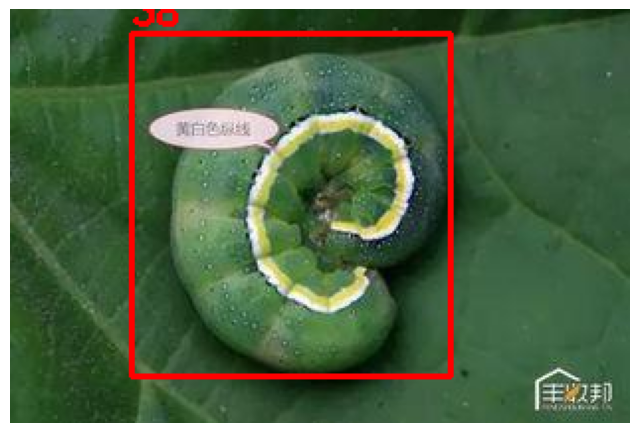

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt

# pick random image from train set
img_dir = "/content/IP102/train/images"
lbl_dir = "/content/IP102/train/labels"

sample = random.choice(os.listdir(img_dir))
img_path = os.path.join(img_dir, sample)
lbl_path = os.path.join(lbl_dir, sample.replace(".jpg", ".txt"))

# read image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# draw YOLO boxes if labels exist
if os.path.exists(lbl_path):
    h, w = img.shape[:2]
    with open(lbl_path, "r") as f:
        for line in f.readlines():
            cls, x, y, bw, bh = map(float, line.strip().split())
            x1 = int((x - bw/2) * w)
            y1 = int((y - bh/2) * h)
            x2 = int((x + bw/2) * w)
            y2 = int((y + bh/2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, str(int(cls)), (x1, y1-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# show image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
%%writefile ip102.yaml
train: /content/IP102/train/images
val: /content/IP102/val/images

nc: 102
names: [ "1","2","3","4","5","6","7","8","9","10",
         "11","12","13","14","15","16","17","18","19","20",
         "21","22","23","24","25","26","27","28","29","30",
         "31","32","33","34","35","36","37","38","39","40",
         "41","42","43","44","45","46","47","48","49","50",
         "51","52","53","54","55","56","57","58","59","60",
         "61","62","63","64","65","66","67","68","69","70",
         "71","72","73","74","75","76","77","78","79","80",
         "81","82","83","84","85","86","87","88","89","90",
         "91","92","93","94","95","96","97","98","99","100","101","102"]


Writing ip102.yaml


In [ ]:
!git clone https://github.com/ultralytics/yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 17581, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 17581 (delta 42), reused 12 (delta 10), pack-reused 17508 (from 3)
Receiving objects: 100% (17581/17581), 16.64 MiB | 17.11 MiB/s, done.
Resolving deltas: 100% (12036/12036), done.


In [ ]:
%cd /content/yolov5


/content/yolov5


In [ ]:
!python train.py --img 224 --batch 32 --epochs 25 \
  --data /content/ip102.yaml \
  --weights yolov5n.pt \
  --name ip102_fast_test


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      20/24      1.29G    0.03659     0.0146    0.04728         78        224:  87% 510/589 [02:41<00:20,  3.90it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      20/24      1.29G    0.03659     0.0146    0.04728         78        224:  87% 511/589 [02:41<00:19,  4.10it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      20/24      1.29G    0.03659     0.0146    0.04729         76        224:  87% 512/589 [02:42<00:18,  4.23it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

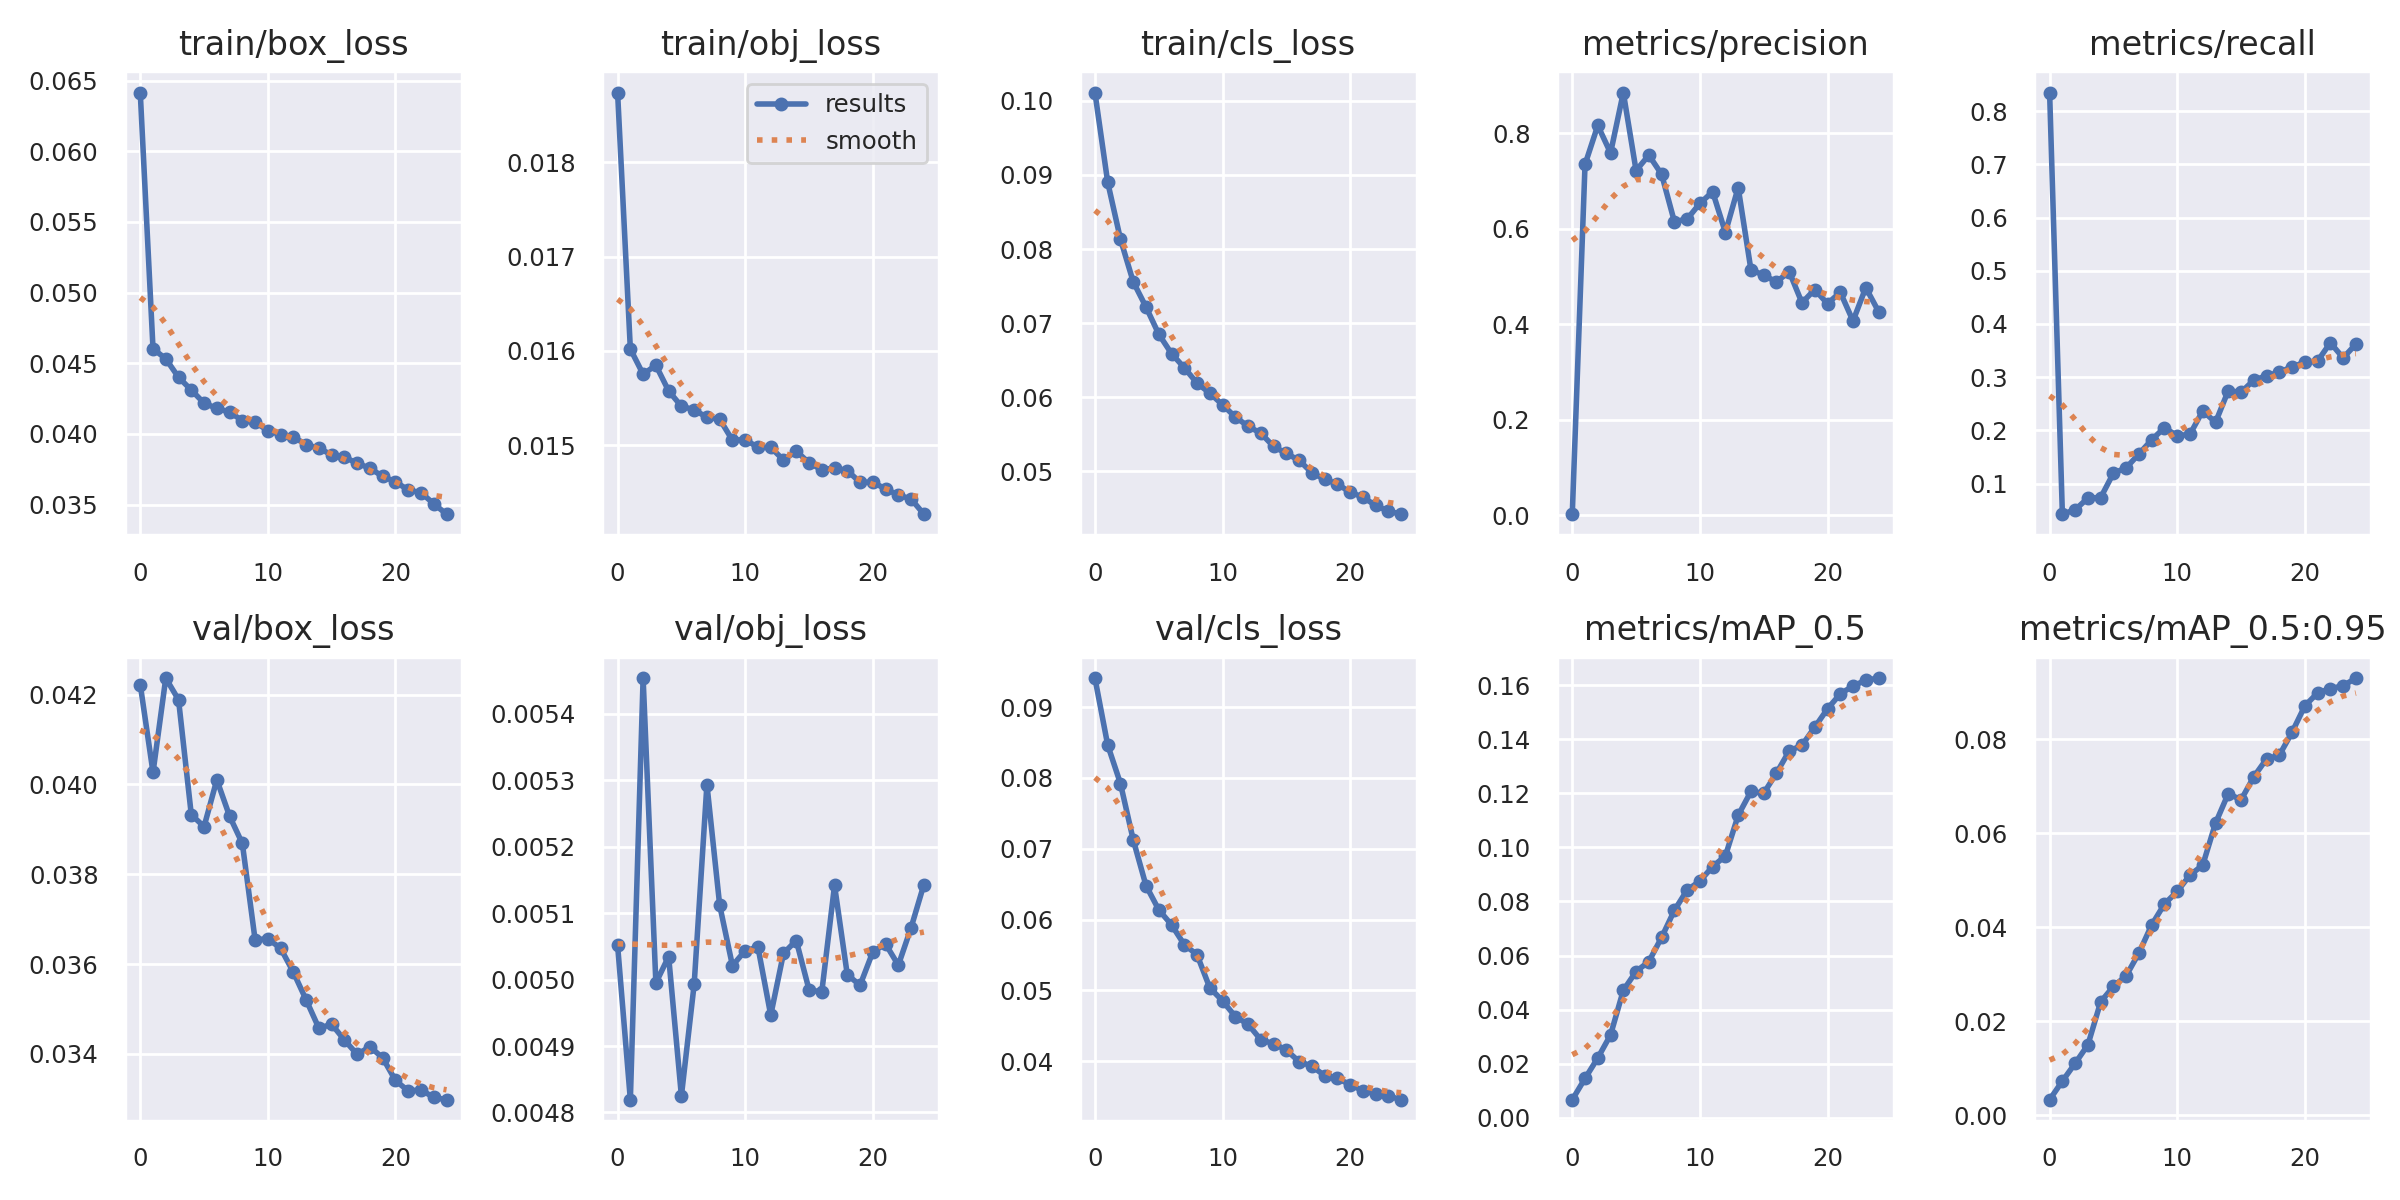

In [ ]:
from IPython.display import Image
Image(filename="runs/train/ip102_fast_test/results.png", width=800)

In [ ]:
!python val.py --weights runs/train/ip102_fast_test/weights/best.pt \
  --data /content/ip102.yaml \
  --img 320

val: data=/content/ip102.yaml, weights=['runs/train/ip102_fast_test/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 1897171 parameters, 0 gradients, 4.6 GFLOPs
val: Scanning /content/IP102/val/labels.cache... 9259 images, 5462 backgrounds, 35 corrupt: 100% 9260/9260 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/IP102/val/images/IP000000000.jpg: ignoring corrupt image/label: negative label values [         -1]
val: WARNING ⚠️ /content/IP102/val/images/IP000000010.jpg: ignoring corrupt image/label: negative label values [         -1]
val: WARNING ⚠️ /content/IP102/val/images/IP000000064.jpg: ignoring corrupt

In [ ]:
!python detect.py --weights runs/train/ip102_fast_test/weights/best.pt \
  --source /content/IP102/val/images \
  --conf 0.05 \
  --img 320

Streaming output truncated to the last 5000 lines.
image 4263/9260 /content/IP102/val/images/IP048000613.jpg: 320x256 1 alfalfa plant bug, 7.4ms
image 4264/9260 /content/IP102/val/images/IP048000616.jpg: 320x320 1 alfalfa plant bug, 1 Cicadella viridis, 11.9ms
image 4265/9260 /content/IP102/val/images/IP048000618.jpg: 224x320 1 alfalfa plant bug, 8.0ms
image 4266/9260 /content/IP102/val/images/IP048000619.jpg: 320x320 1 alfalfa plant bug, 1 Cicadella viridis, 6.8ms
image 4267/9260 /content/IP102/val/images/IP048000620.jpg: 320x320 1 Cicadella viridis, 7.3ms
image 4268/9260 /content/IP102/val/images/IP048000627.jpg: 224x320 1 alfalfa plant bug, 6.7ms
image 4269/9260 /content/IP102/val/images/IP048000631.jpg: 320x256 1 Cicadella viridis, 6.8ms
image 4270/9260 /content/IP102/val/images/IP048000632.jpg: 256x320 1 alfalfa plant bug, 6.7ms
image 4271/9260 /content/IP102/val/images/IP048000638.jpg: 224x320 1 alfalfa plant bug, 1 Cicadella viridis, 7.8ms
image 4272/9260 /content/IP102/val/imag